# Step 1: Explore the dataset

### Tasks:
- Load images from data/.
- Check number of images per class.
- Visualize some samples from each class.
- Identify class imbalance (if some classes have fewer images than others).
- clean Data from corrupted images if found

### Goal: Understand your dataset size and variability.

In [23]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError # load and display images.
import numpy as np # To convert images to arrays

from collections import Counter # count how many images each class has.

In [17]:
data_dir = "/Users/rodynaamr/Image_Classification_SVM_kNN/data"

# Count images in each class


In [18]:
class_counts = {}
classes = sorted(os.listdir(data_dir))

for cls in classes:
    class_path = os.path.join(data_dir, cls)
    images = [f for f in os.listdir(class_path) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
    class_counts[cls] = len(images)

print("Images per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

Images per class:
cardboard: 259 images
glass: 401 images
metal: 328 images
paper: 476 images
plastic: 386 images
trash: 110 images


# Visualize 3 sample images from each class



Showing samples for class: cardboard


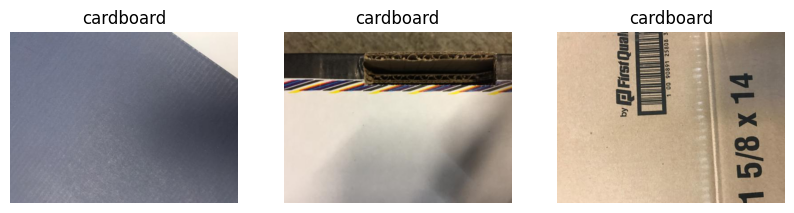


Showing samples for class: glass


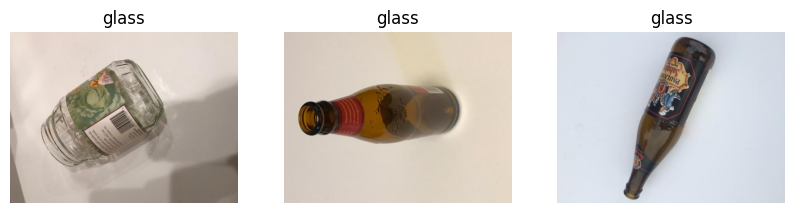


Showing samples for class: metal
❌ Skipping corrupted file: /Users/rodynaamr/Image_Classification_SVM_kNN/data/metal/19861069-7ec9-4b61-92cf-fded78a27ab5.jpg


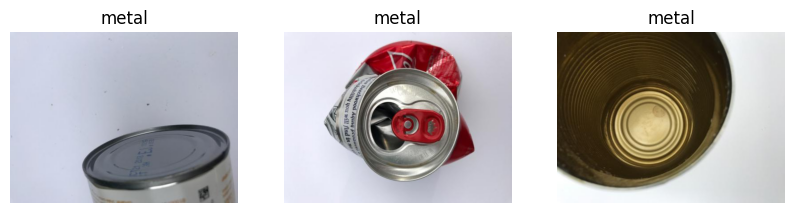


Showing samples for class: paper
❌ Skipping corrupted file: /Users/rodynaamr/Image_Classification_SVM_kNN/data/paper/e9ddd8f5-85d6-45e0-b607-104259ca6fbb.jpg
❌ Skipping corrupted file: /Users/rodynaamr/Image_Classification_SVM_kNN/data/paper/3b5bb1a4-7819-4167-a610-5e35c6f4b074.jpg


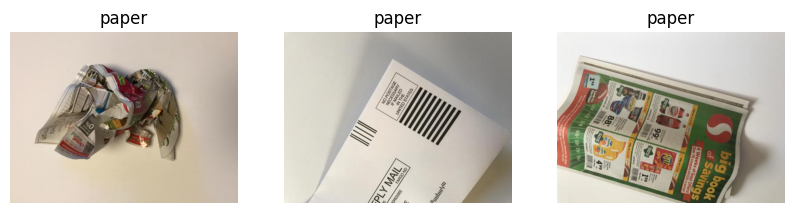


Showing samples for class: plastic


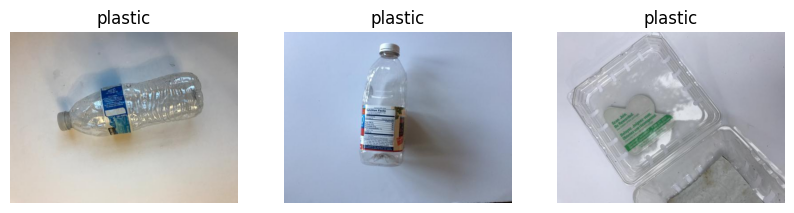


Showing samples for class: trash


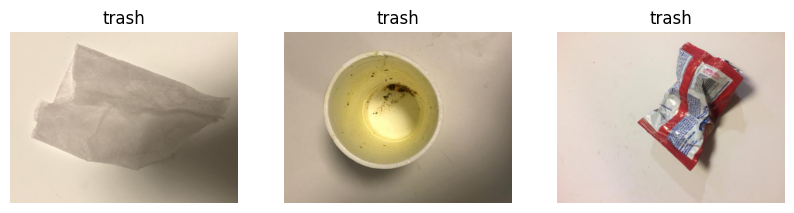

In [24]:
for cls in classes:
    class_path = os.path.join(data_dir, cls)
    images = [f for f in os.listdir(class_path) if f.lower().endswith((".png", ".jpg", ".jpeg"))]

    print(f"\nShowing samples for class: {cls}")

    plt.figure(figsize=(10, 3))
    shown = 0

    for file in images:
        if shown == 3:
            break

        img_path = os.path.join(class_path, file)

        try:
            img = Image.open(img_path)
            img = img.convert("RGB")   # avoids some errors
        except UnidentifiedImageError:
            print(f"❌ Skipping corrupted file: {img_path}")
            continue

        plt.subplot(1, 3, shown + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis("off")
        shown += 1

    plt.show()

### note: after viewing the data corrupted files where found do we should clean them from DB before we turn images into vectors or performing data augmentation

# remove corrupted images

In [27]:
removed_files = []

for cls in os.listdir(data_dir):
    class_path = os.path.join(data_dir, cls)

    for file in os.listdir(class_path):
        file_path = os.path.join(class_path, file)

        # Only check image extensions
        if not file.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        try:
            img = Image.open(file_path)
            img.verify()  # verify file integrity
        except (UnidentifiedImageError, OSError):
            print(f"❌ Removing corrupted image: {file_path}")
            removed_files.append(file_path)
            os.remove(file_path)

print("\n🧹 Cleanup complete!")
print(f"Total corrupted images removed: {len(removed_files)}")


🧹 Cleanup complete!
Total corrupted images removed: 0
